In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replaceing blanks with 0 as tenure is 0 yotal charges are recorded

In [50]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
df.isnull().sum().sum()

0

In [54]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [56]:
df["customerID"].duplicated().sum()

0

# converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [60]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

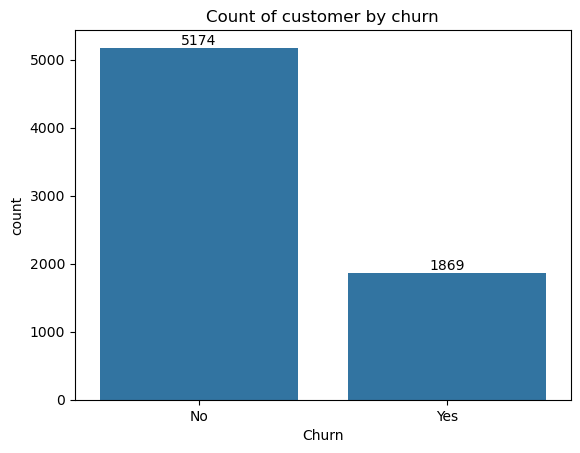

In [77]:
ax =sns.countplot(x = "Churn" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by churn") 
plt.show()

# from the given pie chart we can comclude that 26.54 of our customers have churned out #not let's explore the reason behind it.

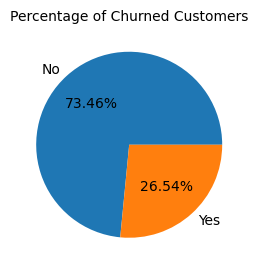

In [80]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize =10)
plt.show()

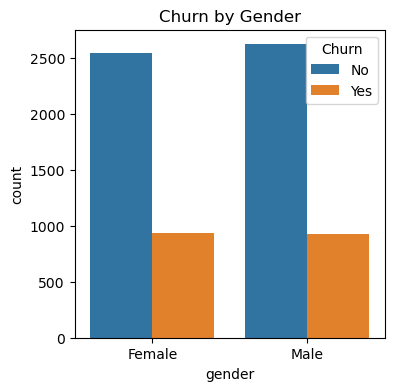

In [96]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

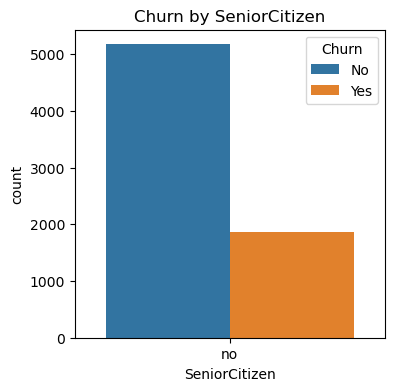

In [100]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

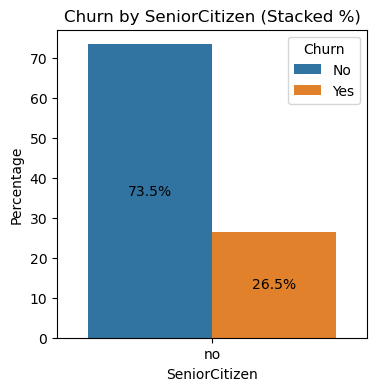

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute percentage of churn per SeniorCitizen category
cross_tab = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index") * 100
cross_tab = cross_tab.reset_index()

# Melt for easier plotting
df_melted = cross_tab.melt(id_vars="SeniorCitizen", var_name="Churn", value_name="Percentage")

# Plot
plt.figure(figsize=(4, 4))
sns.barplot(x="SeniorCitizen", y="Percentage", hue="Churn", data=df_melted)

# Add percentage labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (Stacked %)")
plt.ylabel("Percentage")
plt.show()


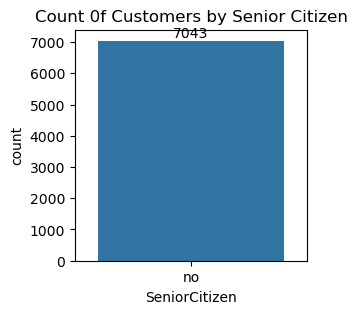

In [102]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x = "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("Count 0f Customers by Senior Citizen")
plt.show()

#people whi ahve used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

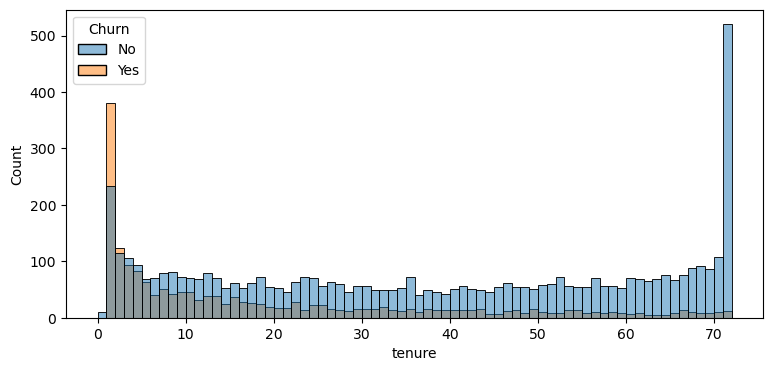

In [106]:
plt.figure(figsize = (9,4))
sns.histplot(x ="tenure", data = df, bins = 72, hue= "Churn")
plt.show()

#people who have month to month contact are likely to churn then from those who have 1 or 2 years or contract.

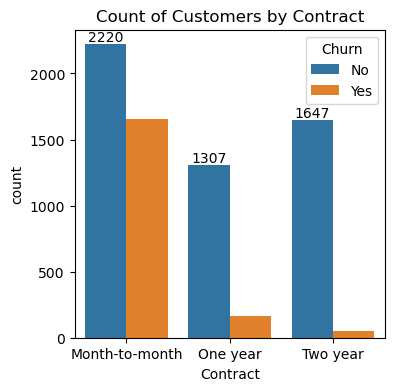

In [111]:
plt.figure(figsize =(4,4))
ax = sns.countplot(x ="Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [112]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#the majority of customers who do not churn tend to have services like phoneservices,internetservices (particularly DSL). and online security enabled. for services like onlinebackup. techsupport and streamingTV. churn rates are noticeably higher when these services are not used or unvailable.¶

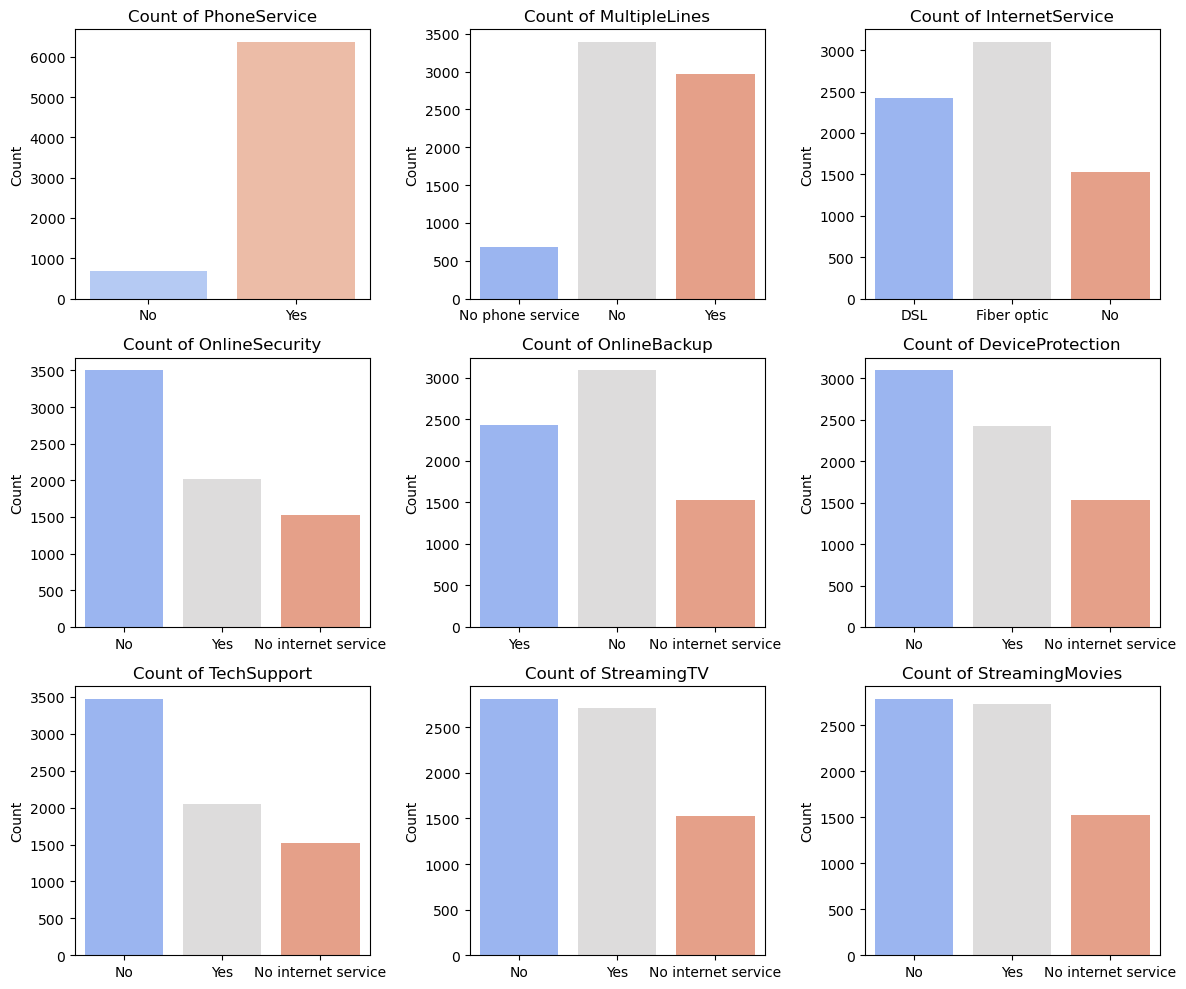

In [113]:

# List of categorical columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))  # 3x3 grid layout

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a countplot for each column
for i, col in enumerate(cols):
    sns.countplot(x=df[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Count of {col}")  # Add title
    axes[i].set_xlabel("")  # Hide x-label to reduce clutter
    axes[i].set_ylabel("Count")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#customer is likely to churn when he is elctronic chcek as a payment method

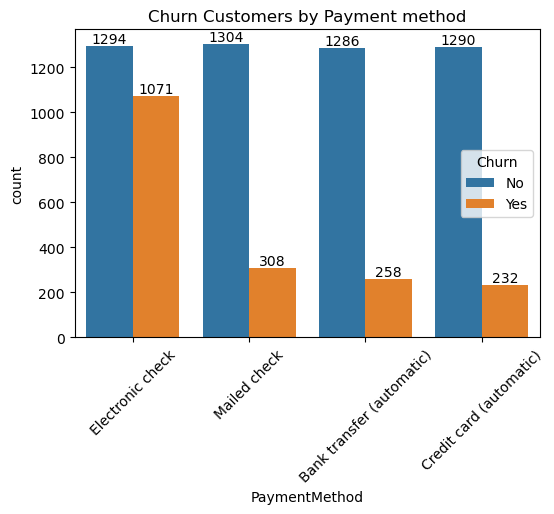

In [116]:
plt.figure(figsize =(6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Customers by Payment method")
plt.xticks(rotation = 45)
plt.show()